In [206]:
#!pip install tensorflow-gpu


In [207]:
import tensorflow as tf

In [208]:
print(tf.__version__)

2.12.0


In [209]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [210]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [211]:
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [212]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [213]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [214]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)




In [215]:
# Part 2 - Now let's make the ANN!

In [216]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout


In [217]:
# Initialising the ANN
classifier = Sequential()

In [218]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=11,activation='relu'))

In [219]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [220]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=1,activation='relu'))

In [221]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [222]:
model_history=classifier.fit(X_train_sc,y_train,validation_split=0.33,batch_size=10,epochs=50)

Epoch 1/50
536/536 [==============================] - 3s 4ms/step - loss: 1.2335 - accuracy: 0.7113 - val_loss: 0.6855 - val_accuracy: 0.7452
Epoch 2/50
536/536 [==============================] - 2s 4ms/step - loss: 0.6089 - accuracy: 0.7744 - val_loss: 0.5772 - val_accuracy: 0.7751
Epoch 3/50
536/536 [==============================] - 2s 3ms/step - loss: 0.5265 - accuracy: 0.7867 - val_loss: 0.5228 - val_accuracy: 0.7891
Epoch 4/50
536/536 [==============================] - 2s 3ms/step - loss: 0.4983 - accuracy: 0.7983 - val_loss: 0.5566 - val_accuracy: 0.7683
Epoch 5/50
536/536 [==============================] - 2s 3ms/step - loss: 0.4964 - accuracy: 0.8018 - val_loss: 0.4801 - val_accuracy: 0.8046
Epoch 6/50
536/536 [==============================] - 1s 3ms/step - loss: 0.4625 - accuracy: 0.8089 - val_loss: 0.4954 - val_accuracy: 0.8114
Epoch 7/50
536/536 [==============================] - 1s 2ms/step - loss: 0.4500 - accuracy: 0.8207 - val_loss: 0.4771 - val_accuracy: 0.8145
Epoch 

In [223]:
# list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


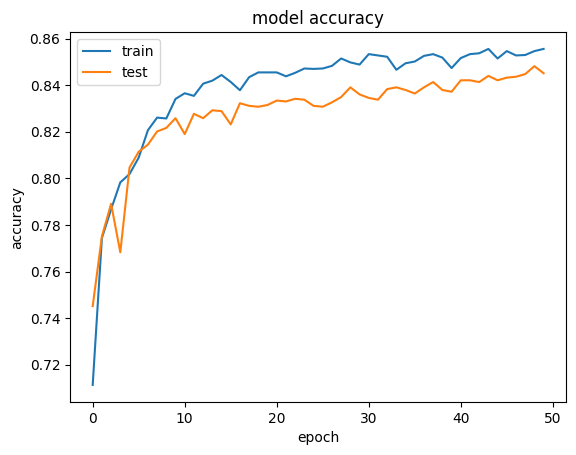

In [224]:

# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

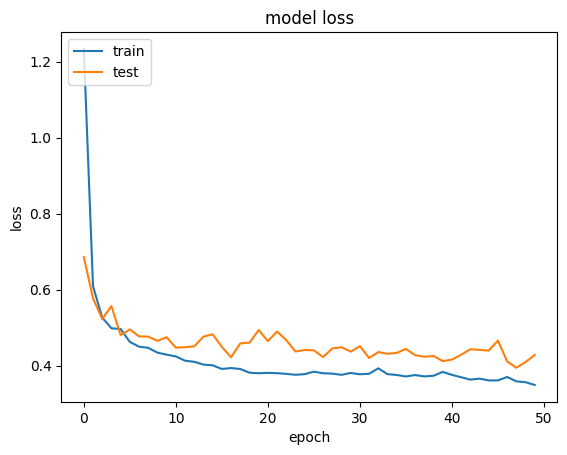

In [225]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [226]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test_sc)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 1ms/step


In [227]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1524,   71],
       [ 220,  185]])

In [228]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [229]:
score

0.8545